In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd
tashkent_houses = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv')
tashkent_houses.head()

,Unnamed: 0,district,rooms,size,level,max_levels,price
0,0,Юнусабадский,3,57.0,4,4,52000.0
1,1,Яккасарайский,2,52.0,4,5,56000.0
2,2,Чиланзарский,2,42.0,4,4,37000.0
3,3,Чиланзарский,3,65.0,1,4,49500.0
4,4,Чиланзарский,3,70.0,3,5,55000.0


In [3]:
tashkent_houses.shape

(7278, 7)

In [4]:
tashkent_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7278 entries, 0 to 7277
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7278 non-null   int64  
 1   district    7278 non-null   object 
 2   rooms       7278 non-null   int64  
 3   size        7278 non-null   float64
 4   level       7278 non-null   int64  
 5   max_levels  7278 non-null   int64  
 6   price       7278 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 398.1+ KB


In [5]:
tashkent_houses.describe()

,Unnamed: 0,rooms,size,level,max_levels,price
count,7278.000000,7278.000000,7278.00000,7278.000000,7278.000000,7278.000000
mean,3735.910552,2.578318,70.11898,3.689338,5.992718,54092.074196
std,2162.154719,1.030179,29.32120,2.228360,2.583194,29665.210900
min,0.000000,1.000000,1.00000,1.000000,1.000000,2.000000
25%,1862.250000,2.000000,50.00000,2.000000,4.000000,34800.000000
50%,3737.500000,2.000000,65.00000,3.000000,5.000000,45500.000000
75%,5611.750000,3.000000,83.00000,5.000000,9.000000,65000.000000
max,7464.000000,8.000000,279.00000,18.000000,25.000000,220000.000000


In [6]:
tashkent_houses.value_counts()

Unnamed: 0  district           rooms  size   level  max_levels  price   
0           Юнусабадский       3      57.0   4      4           52000.0     1
4973        Мирзо-Улугбекский  4      90.0   4      5           58000.0     1
4999        Юнусабадский       3      107.0  10     13          80000.0     1
4998        Яккасарайский      5      196.0  3      7           170000.0    1
4997        Яккасарайский      2      55.0   13     13          33500.0     1
                                                                           ..
2488        Мирзо-Улугбекский  3      74.0   4      9           55000.0     1
2487        Мирзо-Улугбекский  2      80.0   6      6           70000.0     1
2486        Мирабадский        2      60.0   8      9           48500.0     1
2485        Мирзо-Улугбекский  2      60.0   8      9           48500.0     1
7464        Чиланзарский       1      30.0   2      4           22914.0     1
Name: count, Length: 7278, dtype: int64

In [7]:
chil_houses = tashkent_houses[tashkent_houses['district'] == 'Чиланзарский']
chil_houses.head()

,Unnamed: 0,district,rooms,size,level,max_levels,price
2,2,Чиланзарский,2,42.0,4,4,37000.0
3,3,Чиланзарский,3,65.0,1,4,49500.0
4,4,Чиланзарский,3,70.0,3,5,55000.0
5,5,Чиланзарский,1,28.0,1,4,25500.0
6,6,Чиланзарский,1,30.0,2,4,21200.0


In [ ]:
chil_houses.shape

(1616, 7)

In [ ]:
chil_houses.isnull().sum()

Unnamed: 0    0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

--- LABELLING ---

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(chil_houses, test_size=0.1, random_state=42)

In [10]:
from sklearn import linear_model
MLR_model = linear_model.LinearRegression()
x_train = np.asanyarray(train_set[['rooms','size','level','max_levels']])
# x_train = np.asanyarray(train_set[['size','max_levels']])
y_train = np.asanyarray(train_set[['price']])
MLR_model.fit (x_train, y_train)
# (theta1, theta2, ...)
print('Coefficients: ', MLR_model.coef_)
print('theta0:', MLR_model.intercept_)

Coefficients:  [[-3010.03748405   862.9397714  -1555.84111641   148.01175648]]
theta0: [3458.35118233]


--- GRAPICS --


<Figure size 2000x1200 with 0 Axes>

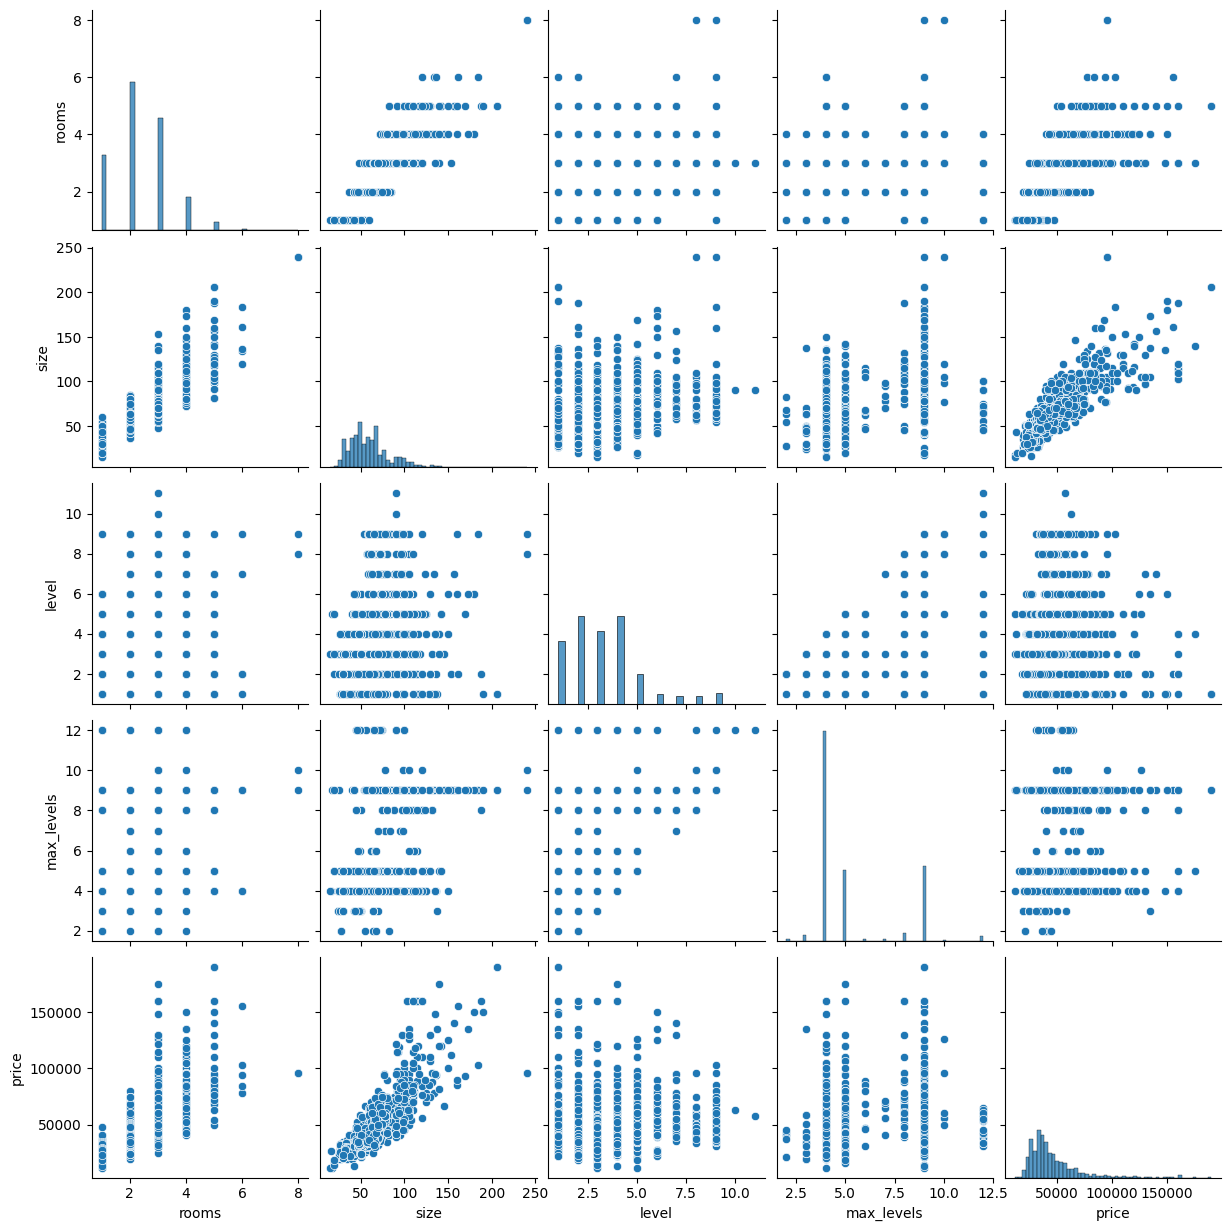

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20,12))
sns.pairplot(chil_houses[['rooms','size','level','max_levels','price']])
plt.show()

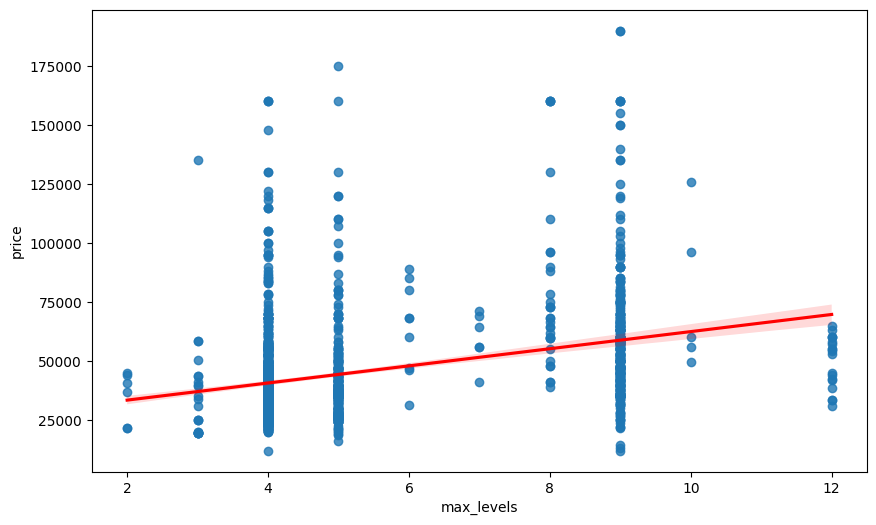

In [13]:
#optional - for_show_the_proportion

plt.figure(figsize=(10,6))
sns.regplot(data=chil_houses, x='max_levels', y='price', line_kws={"color": "red"})
plt.show()

# --- MULTIPLE LINEAR REGRESSION ---

In [14]:
#using_scikit-learn

chil_houses.shape

(1616, 7)

--- TESTING the Model ---

In [15]:
x_test = np.asanyarray(test_set[['rooms','size','level','max_levels']])
# x_test = np.asanyarray(test_set[['size','max_levels']])
y_test = np.asanyarray(test_set[['price']])
y_predict = MLR_model.predict(x_test)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=7409.794634553287
RMSE=12249.735537524299
